In [14]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [96]:
df_rf = pd.read_csv('result_summary_RF.csv')
df_lr = pd.read_csv('result_summary_LR.csv')

In [140]:
df_rf['Model'] = "Random Forest"
df_lr['Model'] = "Linear Regression"
df = pd.concat([df_lr, df_rf])
df['R-Squared'] = np.where(df['R-Squared']<0, 0, df['R-Squared'])
df

,Drug,RMSE,R-Squared,Model
0,Dacarbazine,1.289153,0.000000,Linear Regression
1,Temozolomide,1.074381,0.000000,Linear Regression
2,Paclitaxel,1.169973,0.000952,Linear Regression
3,Cisplatin,1.219281,0.054212,Linear Regression
4,Dabrafenib,3.679288,0.000000,Linear Regression
5,Trametinib,2.190939,0.000000,Linear Regression
6,Nilotinib,1.719690,0.000000,Linear Regression
7,Dasatinib,3.182056,0.000000,Linear Regression
0,Dacarbazine,0.789429,0.000000,Random Forest
1,Temozolomide,0.661715,0.231074,Random Forest


/var/folders/qx/3vp1wz890td1z0ydr3m8x23w0000gn/T/ipykernel_63924/1448335207.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired')


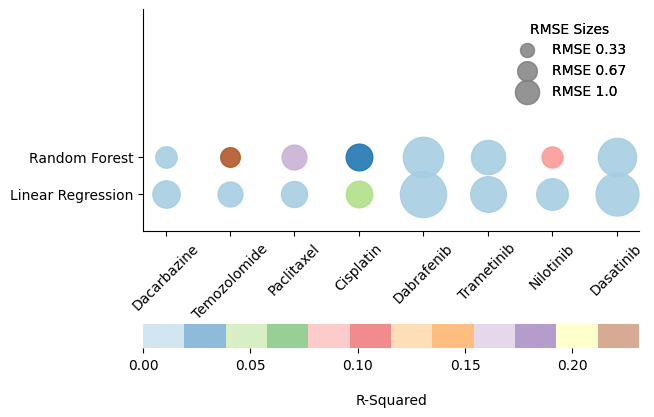

In [199]:
fig = plt.figure()
models = df['Model'].unique()
drugs = df['Drug'].unique()

drug_to_idx = {drug: idx for idx, drug in enumerate(drugs)}
model_to_idx = {model: idx*.2 for idx, model in enumerate(models)}

norm = plt.Normalize(df['R-Squared'].min(), df['R-Squared'].max())
cmap = plt.cm.get_cmap('Paired')

for i, model in enumerate(models):
    for j, drug in enumerate(drugs):
        df_ = df[(df['Model']==model) & (df['Drug']==drug)]
        plt.scatter(drug_to_idx[drug], model_to_idx[model], s=df_['RMSE']*300, c=[cmap(norm(df_['R-Squared']))], alpha=0.9)
        #plt.text(drug_to_idx[drug], model_to_idx[model], round(rmse,2), size=7)

plt.ylim(-0.2,1)
plt.xticks(ticks=np.arange(len(drugs)), labels=drugs, rotation=45)
plt.yticks(ticks=[0,0.2], labels=models)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, location="bottom", orientation="horizontal", pad=0.25, alpha=0.5)
cbar.set_label('R-Squared', labelpad=15)
cbar.outline.set_visible(False)

handles = [plt.scatter([], [], s=size, c='gray', alpha=0.6) for size in [100, 200, 300]]
labels = ['RMSE 0.33', 'RMSE 0.67', 'RMSE 1.0']
legend = plt.legend(handles, labels, title='RMSE Sizes', loc='upper right', frameon=False)
ax.add_artist(legend)

'''
handles_r2 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(val)), markersize=10) 
              for val in [df['R-Squared'].min(), df['R-Squared'].max()]]
labels_r2 = ['R-Squared Min', 'R-Squared Max']
legend_r2 = plt.legend(handles_r2, labels_r2, title='R-Squared Colors', loc='upper left', frameon=True)
ax.add_artist(legend_r2)
'''

plt.savefig('result_compare.png')

## code below is not used

In [29]:
rmse_rf = df_rf[['Drug','RMSE']]
rmse_lr = df_lr[['Drug','RMSE']]
rmse_rf['Model'] = "Random Forest"
rmse_lr['Model'] = "Linear Regression"
rmse_df = pd.concat([rmse_lr, rmse_rf])

In [30]:
pivot_table = rmse_df.pivot('Model', 'Drug', 'RMSE')

/var/folders/qx/3vp1wz890td1z0ydr3m8x23w0000gn/T/ipykernel_63924/4259596323.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = rmse_df.pivot('Model', 'Drug', 'RMSE')


In [31]:
pivot_table

Drug,Cisplatin,Dabrafenib,Dacarbazine,Dasatinib,Nilotinib,Paclitaxel,Temozolomide,Trametinib
Model,,,,,,,,
Linear Regression,1.219281,3.679288,1.289153,3.182056,1.71969,1.169973,1.074381,2.190939
Random Forest,1.231745,2.824784,0.789429,2.527916,0.76305,1.065528,0.661715,2.021449


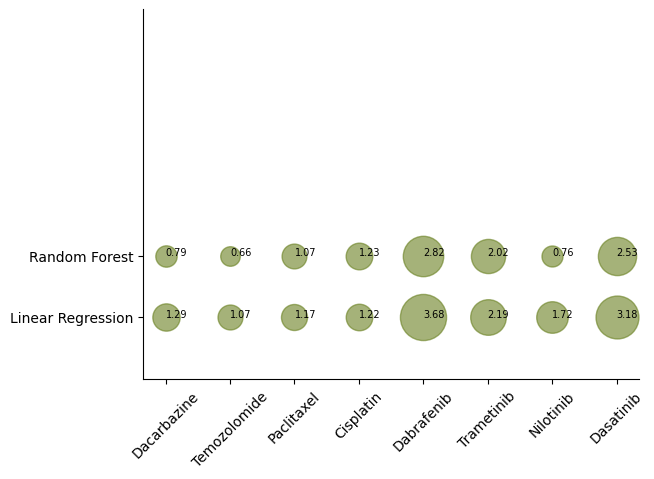

In [93]:
fig = plt.figure()
models = rmse_df['Model'].unique()
drugs = rmse_df['Drug'].unique()

drug_to_idx = {drug: idx for idx, drug in enumerate(drugs)}
model_to_idx = {model: idx*.2 for idx, model in enumerate(models)}

for i, model in enumerate(models):
    for j, drug in enumerate(drugs):
        rmse = pivot_table.loc[model, drug]
        
        plt.scatter(drug_to_idx[drug], model_to_idx[model], s=rmse * 300, c='#698020', alpha=0.6)
        #plt.text(drug_to_idx[drug], model_to_idx[model], round(rmse,2), size=7)

plt.ylim(-0.2,1)
plt.xticks(ticks=np.arange(len(drugs)), labels=drugs, rotation=45)
plt.yticks(ticks=[0,0.2], labels=models)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [83]:
model_to_idx

{'Linear Regression': 0.0, 'Random Forest': 0.2}

In [35]:
models

array(['Linear Regression', 'Random Forest'], dtype=object)